# Machine Learning Project

# Visualizations of input data

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import time
from math import sqrt
import seaborn as sns
# Import necessary modules
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.neural_network import MLPClassifier
from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import recall_score

In [4]:
path_to_file = "/home/shravanthi/Downloads/sem2/ML/HW/5/FeaturesValues.xlsx"
data = pd.read_excel(path_to_file, header = 2)
print(data.shape)
data.sample(15)

(350, 26)


,Label,10-12500,500-1000,1000-1500,7500-8000,10-12500.1,500-1000.1,1000-1500.1,7500-8000.1,10-12500.2,...,7500-8000.3,10-12500.4,10-12500.5,500-1000.4,500-1000.5,1000-1500.4,1000-1500.5,7500-8000.4,7500-8000.5,PenType
105,0,11.522050,9.240328,11.522050,0.618917,9.337415,1.404526,2.849869,0.220837,16.307883,...,0.350743,1.508701,20.183532,0.094484,2.714568,1.315491,7.015228,0.129906,0.571579,M1
201,0,35.637594,26.856860,35.637594,0.767319,17.626562,6.679718,6.971560,0.242383,43.157105,...,0.163701,1.035329,36.288453,0.299322,13.658758,0.696688,13.246432,0.078682,0.406084,F1
97,1,51.426270,51.426270,42.690102,0.509209,27.109020,8.347841,11.029905,0.233005,33.536847,...,0.042338,10.639973,43.578067,2.627875,14.067808,4.002368,18.057442,0.190667,0.275344,M1
258,0,0.206434,0.003353,0.000958,0.000001,0.031734,0.000583,0.000116,0.000000,0.483455,...,0.000000,0.007520,0.070988,0.000140,0.001306,0.000029,0.000260,0.000000,0.000001,EF4
226,1,50.104937,50.104937,26.266851,0.349499,15.590469,7.979492,5.275261,0.132112,31.727014,...,0.139237,3.916058,35.096996,0.482289,15.476695,0.696629,11.247150,0.007125,0.271349,F1
344,1,60.022417,47.584537,60.022417,1.391788,32.334665,9.475396,14.239677,0.416688,47.835909,...,0.412050,3.871014,68.540344,2.547204,21.497996,2.262987,26.216366,0.004638,0.828738,EF1
110,0,14.609099,14.609099,11.191037,0.763811,9.279403,3.163098,2.541152,0.226842,9.425186,...,0.099426,0.539999,18.018806,1.428827,4.897370,0.496743,5.579046,0.127416,0.326268,M1
253,0,120.704943,120.704943,85.124435,4.219099,35.360109,14.588928,15.228921,1.207706,210.898645,...,3.378996,57.366452,128.086669,20.855803,50.033660,22.078417,52.536259,2.171289,4.586702,EF4
108,1,5.697834,2.560255,5.697834,0.365258,4.105988,0.814575,1.176020,0.106888,10.007004,...,0.058345,3.623273,11.835250,1.112128,2.741278,2.402226,4.754266,0.048543,0.165233,M1
271,1,115.192806,115.192806,55.759757,0.516446,29.223693,11.904246,13.035399,0.190484,46.580066,...,0.244767,6.112330,52.335057,3.377432,20.431059,3.223623,22.847175,0.054283,0.435251,EF3


# Visualization for input data

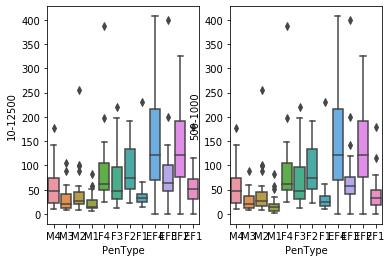

In [104]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(  y="10-12500", x= "PenType", data=data,  orient='v' , ax=axes[0])
sns.boxplot(  y="500-1000", x= "PenType", data=data,  orient='v' , ax=axes[1])
# sns.boxplot(  y="7500-8000", x= "PenType", data=data,  orient='v' , ax=axes[0])
# sns.boxplot(  y="1000-1500", x= "PenType", data=data,  orient='v' , ax=axes[1])

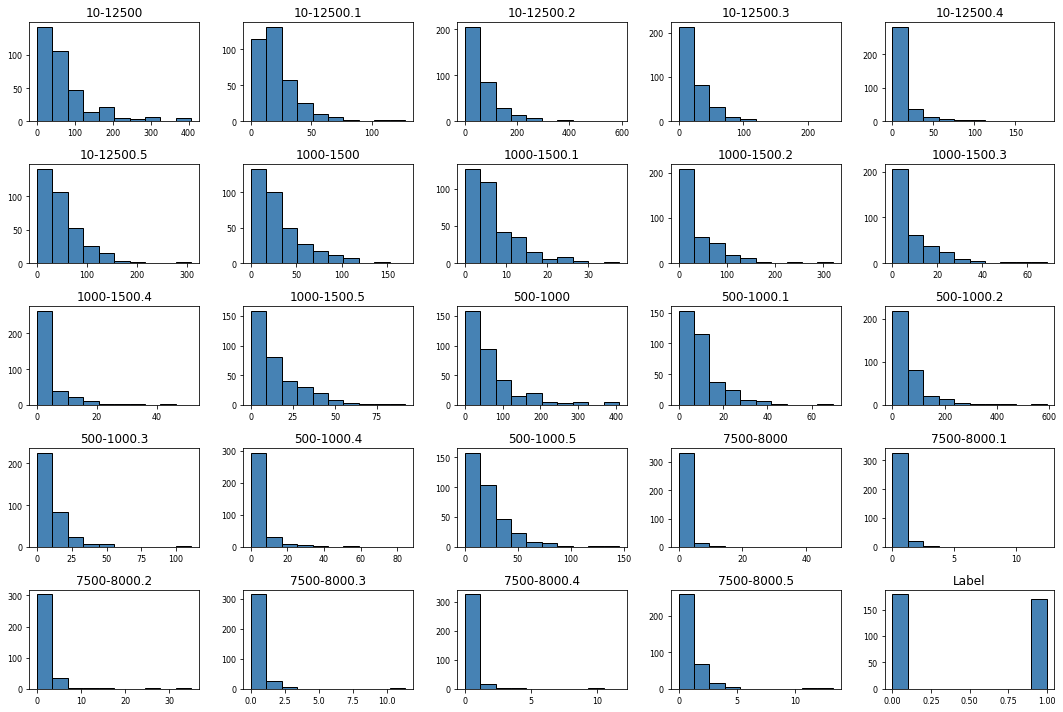

In [5]:
data.hist(bins=10, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2.5, 2.5))
plt.show()

/home/shravanthi/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


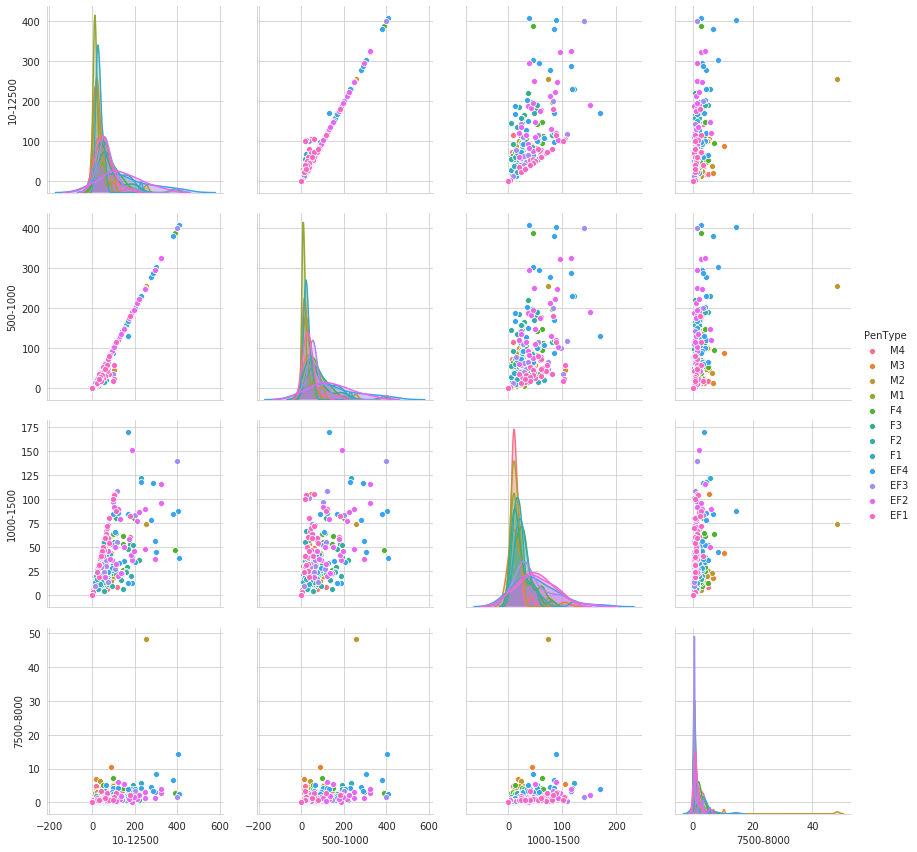

In [6]:
data1=data.drop(['Label','10-12500.1','500-1000.1', '1000-1500.1', '7500-8000.1', '10-12500.2', '500-1000.2',
       '1000-1500.2', '7500-8000.2', '10-12500.3', '500-1000.3', '1000-1500.3',
       '7500-8000.3', '10-12500.4', '10-12500.5', '500-1000.4', '500-1000.5',
       '1000-1500.4', '1000-1500.5', '7500-8000.4', '7500-8000.5'], axis=1)
data1.head()
sns.set_style("whitegrid");
sns.pairplot(data1, hue="PenType", size=3);
plt.show()

# Visualization for varying Pentypes

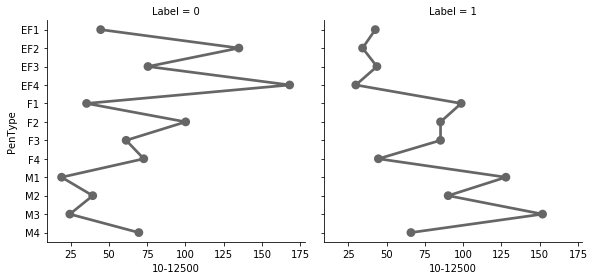

In [24]:

g = sns.FacetGrid(data, col="Label", col_wrap=4, height=4, ylim=(0, 10))
g.map(sns.pointplot, "10-12500","PenType", color=".4", ci=None);

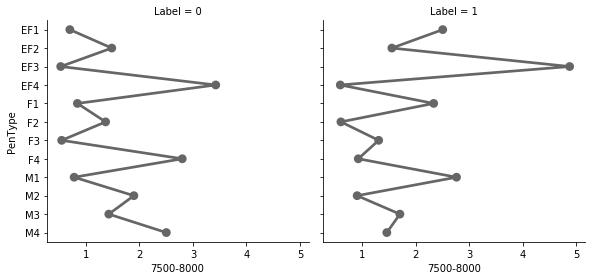

In [98]:
g = sns.FacetGrid(data, col="Label", col_wrap=4, height=4, ylim=(0, 10))
g.map(sns.pointplot, "7500-8000","PenType", color=".4", ci=None);

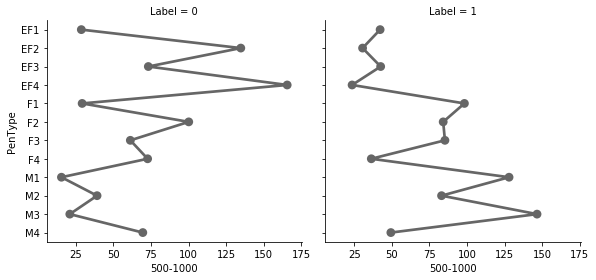

In [100]:
g = sns.FacetGrid(data, col="Label", col_wrap=4, height=4, ylim=(0, 10))
g.map(sns.pointplot, "500-1000","PenType", color=".4", ci=None);

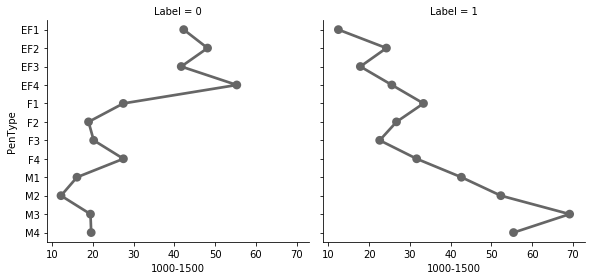

In [101]:
g = sns.FacetGrid(data, col="Label", col_wrap=4, height=4, ylim=(0, 10))
g.map(sns.pointplot, "1000-1500","PenType", color=".4", ci=None);

# Visualizations with respect to specific pentype

In [59]:
is_M4 = data['PenType'] == 'M4'
print(is_M4.head())

data_M4 = data[is_M4]
print(data_M4.shape)

data_M4 = data_M4.iloc[:,0:5]

0    True
1    True
2    True
3    True
4    True
Name: PenType, dtype: bool
(28, 26)


# Visualization for Pentype M4

/home/shravanthi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/shravanthi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


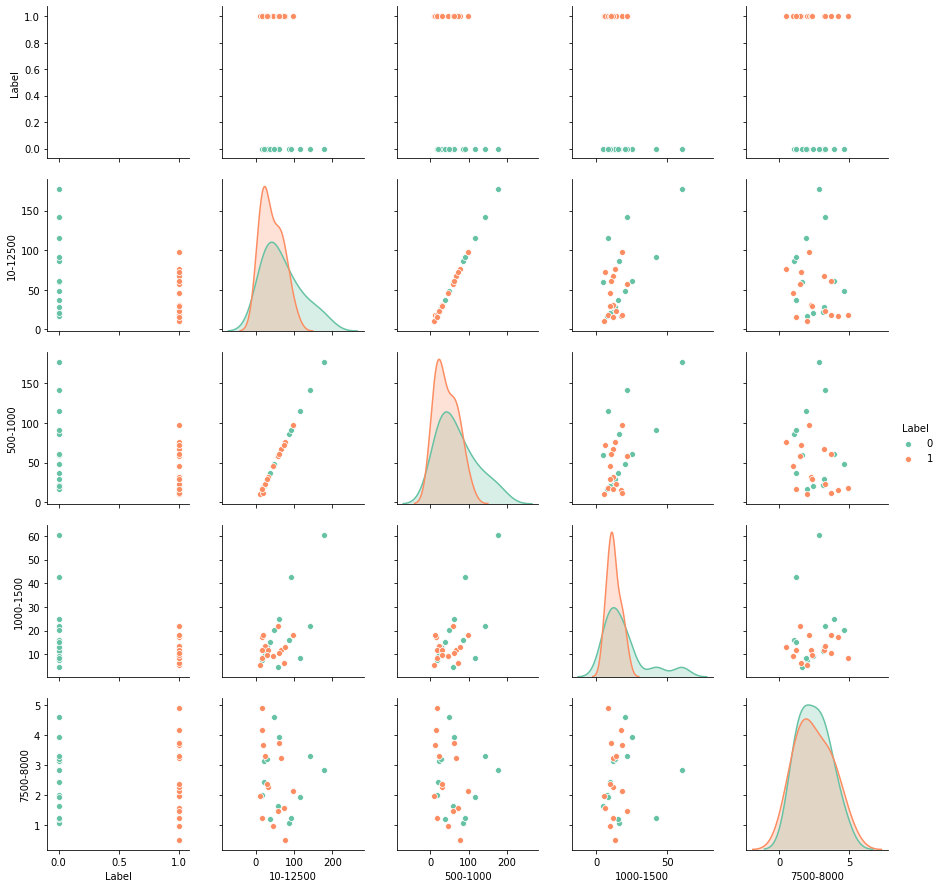

In [102]:

g = sns.pairplot(data_M4, hue="Label", palette="Set2", diag_kind="kde", height=2.5)

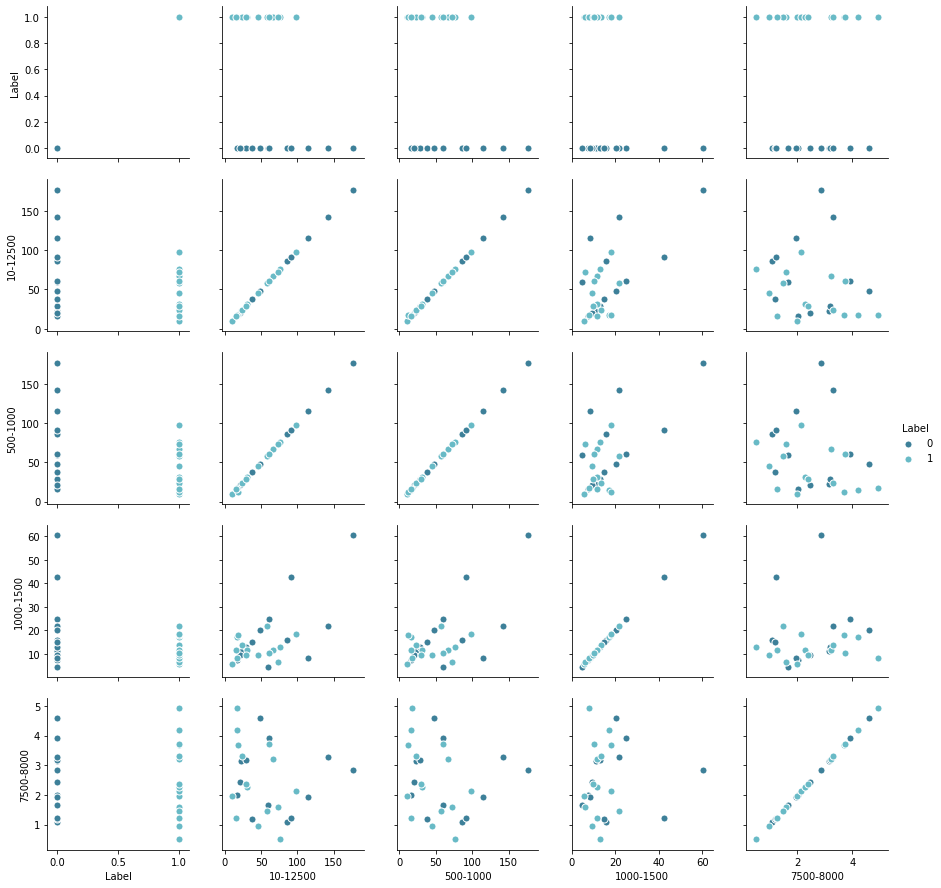

In [48]:
g = sns.PairGrid(data_M4, hue="Label", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

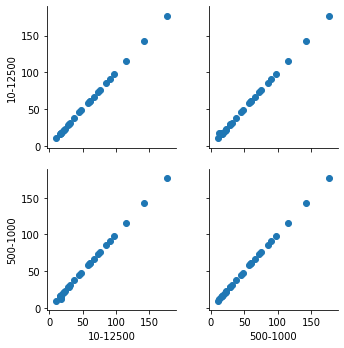

In [51]:
g = sns.PairGrid(data_M4, vars=["10-12500", "500-1000"])
g.map(plt.scatter);

# Function to modify the dataset/ filter the dataset for specific Pentypes

In [81]:
def reduced_dataset(data,x):
    is_pentype = data['PenType'] == x
    data_pentype = data[is_pentype]
    data_pentype = data_pentype.iloc[:,0:5]
    return data_pentype

data_M4 = reduced_dataset(data,'M4')
data_M3 = reduced_dataset(data,'M3')
data_M2 = reduced_dataset(data,'M2')
data_M1 = reduced_dataset(data,'M1')
data_EF1 = reduced_dataset(data,'EF1')
data_EF2 = reduced_dataset(data,'EF2')
data_EF3 = reduced_dataset(data,'EF3')
data_EF4 = reduced_dataset(data,'EF4')
data_F1 = reduced_dataset(data,'F1')
data_F2 = reduced_dataset(data,'F2')
data_F3 = reduced_dataset(data,'F3')
data_F4 = reduced_dataset(data,'F4')
    

# Visulization comparing dataset specific to pentype M4, M3, M2 and M1

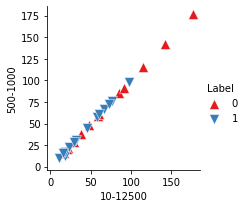

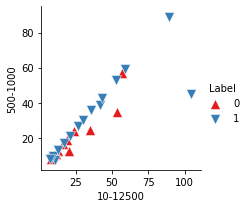

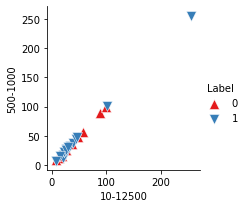

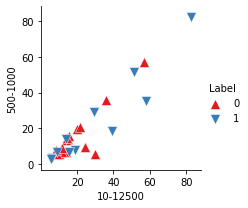

In [96]:
g = sns.FacetGrid(data_M4, hue="Label", palette="Set1", height=3, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "10-12500", "500-1000", s=100, linewidth=.5, edgecolor="white")
g.add_legend();
g = sns.FacetGrid(data_M3, hue="Label", palette="Set1", height=3, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "10-12500", "500-1000", s=100, linewidth=.5, edgecolor="white")
g.add_legend();
g = sns.FacetGrid(data_M2, hue="Label", palette="Set1", height=3, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "10-12500", "500-1000", s=100, linewidth=.5, edgecolor="white")
g.add_legend();
g = sns.FacetGrid(data_M1, hue="Label", palette="Set1", height=3, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "10-12500", "500-1000", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

# Visulization comparing dataset specific to pentype F1, F2, F3 and F4


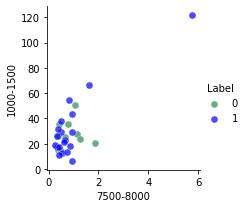

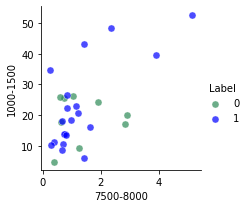

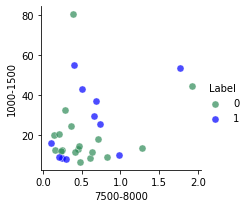

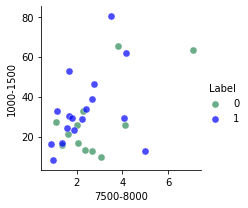

In [95]:
pal = ("seagreen","blue")
g = sns.FacetGrid(data_F1, hue="Label",palette=pal,height=3)
g.map(plt.scatter, "7500-8000", "1000-1500", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

g = sns.FacetGrid(data_F2, hue="Label",palette=pal,height=3)
g.map(plt.scatter, "7500-8000", "1000-1500", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

g = sns.FacetGrid(data_F3, hue="Label",palette=pal,height=3)
g.map(plt.scatter, "7500-8000", "1000-1500", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

g = sns.FacetGrid(data_F4, hue="Label",palette=pal,height=3)
g.map(plt.scatter, "7500-8000", "1000-1500", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

# Visulization comparing dataset specific to pentype EF1, EF2, EF3 and EF4


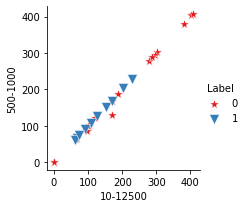

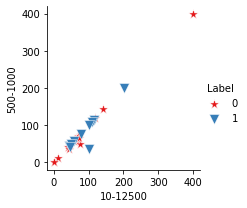

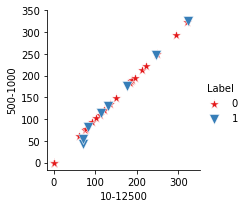

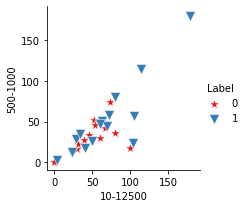

In [108]:
g = sns.FacetGrid(data_EF4, hue="Label", palette="Set1", height=3, hue_kws={"marker": ["*", "v"]})
g.map(plt.scatter, "10-12500", "500-1000", s=100, linewidth=.5, edgecolor="white")
g.add_legend();
g = sns.FacetGrid(data_EF3, hue="Label", palette="Set1", height=3, hue_kws={"marker": ["*", "v"]})
g.map(plt.scatter, "10-12500", "500-1000", s=100, linewidth=.5, edgecolor="white")
g.add_legend();
g = sns.FacetGrid(data_EF2, hue="Label", palette="Set1", height=3, hue_kws={"marker": ["*", "v"]})
g.map(plt.scatter, "10-12500", "500-1000", s=100, linewidth=.5, edgecolor="white")
g.add_legend();
g = sns.FacetGrid(data_EF1, hue="Label", palette="Set1", height=3, hue_kws={"marker": ["*", "v"]})
g.map(plt.scatter, "10-12500", "500-1000", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

Authors: 

Shravanthi Arvind Patil

Sreenivasa Hikkal Venugopala